In [317]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
dataset = pd.read_excel('QBStats_edited.xlsx',index_col=0)

plt.savefig('data')
dataset.head(10)

,Attempt,Completion,Yards,Yards per attempt,Touchdowns,Interceptions,Longest,Sack,Loss,QB Rating,Points,Year,Outcome
Quarterback,,,,,,,,,,,,,
Drew Brees,19,15,160,8.4,2,0,30,1,0,136.8,34,2002,W
Drew Bledsoe,39,26,271,6.9,1,2,52,4,29,73.8,31,2002,L
Peyton Manning,31,19,211,6.8,3,0,28,1,8,113.8,28,2002,W
Quincy Carter,30,13,131,4.4,0,1,31,3,19,42.5,10,2002,L
Tom Brady,43,29,294,6.8,3,0,40,2,14,110.0,30,2002,W
Peyton Manning,45,26,289,6.4,1,3,33,0,0,56.6,13,2002,L
Quincy Carter,24,14,240,10.0,2,0,44,1,10,120.1,21,2002,W
Tom Brady,35,25,269,7.7,2,1,49,0,0,100.8,44,2002,W
Drew Brees,28,15,163,5.8,1,1,35,2,20,68.0,24,2002,W


<Figure size 432x288 with 0 Axes>

In [ ]:
dataset['Outcome_result'] = dataset.Outcome.map({'W':1, 'L':0})
dataset.head()
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=True) # no visible frame


table(ax, dataset)  # where df is your data frame

plt.savefig('mytable.png')

/Users/Vuongiie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  # Remove the CWD from sys.path while we load stuff.


In [263]:
from sklearn import preprocessing 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns 
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)



print(dataset.shape)
print(list(dataset.columns))

(1214, 14)
['Attempt', 'Completion', 'Yards', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Longest', 'Sack', 'Loss', 'QB Rating', 'Points', 'Year', 'Outcome', 'Outcome_result']


In [286]:
dataset1 = dataset["Outcome_result"]
dataset1.shape

(1214,)

In [291]:
#logistic regression


from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

cols = ["Attempt","Completion","Yards","Yards per attempt","Touchdowns","Interceptions","Sack","Loss",]
dataset_final = dataset[cols]

X = dataset_final
Y = dataset["Outcome_result"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

log=LogisticRegression(penalty='l2',C=2)
log.fit(X_train,Y_train)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,log.predict(X_test))

0.7942386831275721

In [292]:
#Initialzing and Fitting a k-NN model
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']],Y_train)

# Checking the performance of our model on the testing data set
accuracy_score(Y_test,knn.predict(X_test[['Attempt','Completion','Yards','Yards per attempt','Touchdowns','Interceptions','Sack','Loss']]))



0.7242798353909465

In [269]:
#Feature scaling 
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

X_train_minmax=min_max.fit_transform(X_train[['Attempt', 'Completion', 'Yards', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Sack', 'Loss',]])

X_test_minmax=min_max.fit_transform(X_test[['Attempt', 'Completion', 'Yards', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Sack', 'Loss',]])

#applying  the scared data to knn=8

knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_minmax,Y_train)
accuracy_score(Y_test,knn.predict(X_test_minmax))

0.7366255144032922

In [270]:
#PCA
from sklearn.decomposition import PCA
pca=PCA()
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

explained_variance=pca.explained_variance_ratio_
pca=PCA(n_components=1)

In [271]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(X_train, Y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [216]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
cm = confusion_matrix(Y_test, y_pred)  
print(cm)  
print('Accuracy:', metrics.accuracy_score(Y_test, y_pred))

[[ 45  59]
 [ 10 129]]
Accuracy: 0.7160493827160493


In [272]:
#decision tree
from sklearn import tree 
from sklearn.datasets import load_iris 

import numpy as np

In [273]:
c = tree.DecisionTreeClassifier()
c.fit(X_train, Y_train)
accu_train = np.sum(c.predict(X_train) == Y_train) / float(Y_train.size)

accu_test = np.sum(c.predict(X_test) == Y_test) / float(Y_test.size)
print ("classification accu on train", accu_train) 
print ("classification accu on test", accu_test) 

classification accu on train 1.0
classification accu on test 0.6748971193415638


In [274]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [293]:

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [294]:
#gini index 
from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

clf_gini.fit(X_train,Y_train)

y_pred = clf_gini.predict(X_test)
y_pred

print("Gini Accuracy is:", accuracy_score(Y_test, y_pred))

Gini Accuracy is: 0.7325102880658436


In [295]:
#information gain
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, Y_train)

y_pred_en = clf_entropy.predict(X_test)

print("Information gain Accuracy is:", accuracy_score(Y_test, y_pred_en))

Information gain Accuracy is: 0.7325102880658436


Optimal number of features: 6
Selected features: ['Attempt', 'Completion', 'Yards per attempt', 'Touchdowns', 'Interceptions', 'Sack']


<Figure size 432x288 with 0 Axes>

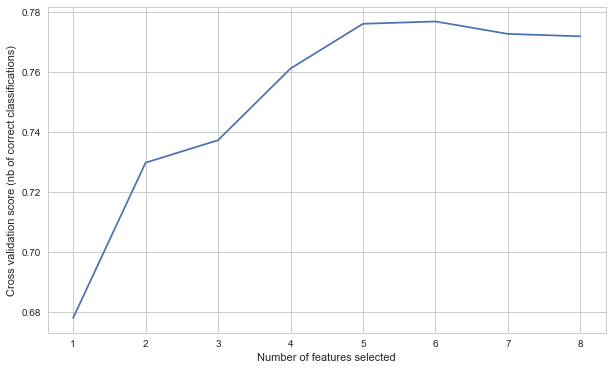

In [308]:
#feature selection
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, Y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
%matplotlib inline
plt.savefig('Features vs cross-validation scres')
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [311]:
from sklearn import metrics
y_pred=log.predict(X_test)
cnf_matrix=metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[ 72,  32],
       [ 18, 121]])

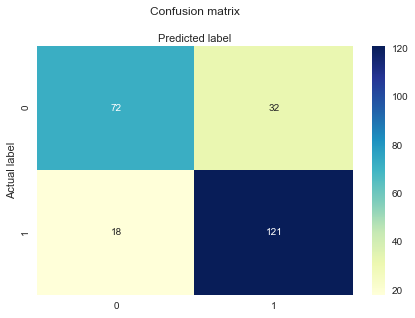

In [309]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion matrix')

In [299]:
print ("Accuracy:", metrics.accuracy_score(Y_test, y_pred))

print ("Precision:", metrics.precision_score(Y_test, y_pred))

print ("Recall:", metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7942386831275721
Precision: 0.7908496732026143
Recall: 0.8705035971223022
